In [2]:
%run binaryRelation.ipynb

..........................................................................
----------------------------------------------------------------------
Ran 74 tests in 0.656s

OK


In [11]:
from graphviz import Digraph, Graph
from IPython.display import IFrame, display

class BinaryRelationGraphRepr(BinaryRelation):
    
    def makeGraph(self, name="graph",filename='cluster.gv'):
        g = Digraph(name=name, node_attr={'shape': 'circle'})
        g.body.append(f'\t label="R(A→B)"')
        g.body.append('\t rankdir=LR;')
        
        dom = self.get_domain()
        codom = self.get_codomain()
        relation = self.get_relation()

        with g.subgraph(name='cluster_dom', node_attr={'shape' : 'circle'}) as s1:
            s1.body.append('\t label="A"')
            for x in dom:
                s1.node(str(x))

        with g.subgraph(name='cluster_rng', node_attr={'shape' : 'circle'}) as s2:
            s2.body.append('\t label="B"')
            for x in codom:
                s2.node(str(x)+"R",str(x))

        for x,y in relation:
            g.edge(str(x),str(y)+"R")

        return g
    
    def makeMatrix(self, name="graph",filename='cluster.gv'):
        g = Graph(name=name, node_attr={'shape': 'rectangle'})
        #g.body.append(f'\t label="R(A→B)"')
        #g.body.append('\t rankdir=LR;')
        
        dom = self.get_domain()
        codom = self.get_codomain()
        relation = self.get_relation()
        
        matrix = self.set2matrix(dom, codom)
        dictionary = self.matrix_relations_dictionary(matrix)

        with g.subgraph(node_attr={'shape' : 'rectangle'}) as s1:

            for p in matrix:
                s1.node(str(p))
        
            for p in matrix:
                for p1 in dictionary[p]:
                    g.edge(str(p),str(p1))

        return g
    
    def set2matrix(self, input_set1, input_set2 = None):
        if input_set2 is None: input_set2 = input_set1;
        return {(x,y) for x in input_set1 for y in input_set2}
    
    def matrix_relations_dictionary(self, matrix):
        dictionary = dict()
        for p in matrix:
            dictionary[p] = set()
            for p1 in matrix:
                x0, y0 = p
                x1, y1 = p1
                if p != p1:
                    if x0 == x1 and abs(y0 - y1) == 1:
                        dictionary[p].add(p1)
                    elif y0 == y1 and abs(x0 - x1) == 1:
                        dictionary[p].add(p1)
        return dictionary
    
    def foo(self):
        s.node('struct3', '''<
                <TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="4">
                  <TR>
                    <TD ROWSPAN="3">hello<BR/>world</TD>
                    <TD COLSPAN="3">b</TD>
                    <TD ROWSPAN="3">g</TD>
                    <TD ROWSPAN="3">h</TD>
                  </TR>
                  <TR>
                    <TD>c</TD>
                    <TD PORT="here">d</TD>
                    <TD>e</TD>
                  </TR>
                  <TR>
                    <TD COLSPAN="3">f</TD>
                  </TR>
                </TABLE>>''')
        
    def foo2(self,name):
        g = Graph(name=name, node_attr={'shape': 'none'}) 
        g.node('tab', label='''<<TABLE><TR><TD>left</TD><TD>right</TD></TR></TABLE>>''')
        return g
        


In [12]:
#r = BinaryRelationGraphRepr({(1,3),(2,3)},{1,2,3},{1,2,3})
#print(r)

#g = r.foo2("matrix_04")#r.makeMatrix("matrix_02")
#print(g.source)
#g.view() #vytvori graph_01.gv.pdf

#matrix = r.set2matrix({1,2,3},{1,2,3})
#print(matrix)

#dictionary = r.matrix_relations_dictionary(matrix)
#print(dictionary)

#IFrame("matrix_03.gv.pdf", width=800, height=800)

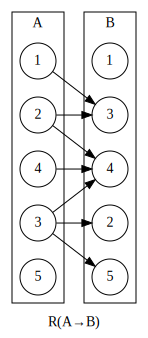

In [13]:
r = BinaryRelationGraphRepr({(1,3),(2,3),(2,4),(3,5),(3,2),(3,4),(4,4)},{1,2,3,4,5},{1,2,3,4,5})
#print(r)

g = r.makeGraph("graph_01")

display(g)
#print(g.source)
#g.view() #vytvori graph_01.gv.pdf

#IFrame("graph_01.gv.pdf", width=400, height=800)